# Reconstruct a cropped domain

**Expected time to run through: 10 mins**

This tutorial demonstrates how to reconstruct a cropped domain to save running time.

## Test data preparation

To go through this tutorial, please prepare test data following the steps:
1. Download the test case named "PAGES2k_CCSM4_GISTEMP" with this [link](https://drive.google.com/drive/folders/1UGn-LNd_tGSjPUKa52E6ffEM-ms2VD-N?usp=sharing).
2. Create a directory named "testcases" in the same directory where this notebook sits.
3. Put the unzipped direcotry "PAGES2k_CCSM4_GISTEMP" into "testcases".

Below, we first load some useful packages, including our `LMRt`.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import os
import numpy as np
import pandas as pd
import xarray as xr

## Load and modify configurations

We will first load the given example YAML file, which is set to reconstruct the temperature field only.
We then modify specific items to set it to reconstruct both the temperature and sea level pressure fields.

In [2]:
job = LMRt.ReconJob()
job.load_configs(cfg_path='./testcases/PAGES2k_CCSM4_GISTEMP/configs.yml', verbose=True)

LMRt: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PAGES2k_CCSM4_GISTEMP/configs.yml
LMRt: job.load_configs() >>> job.configs created
LMRt: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon
LMRt: job.load_configs() >>> /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon created
{'anom_period': [1951, 1980],
 'job_dirpath': '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/obs/gistemp1200_ERSSTv4.nc'},
 'obs_varname': {'tas': 'tempanomaly'},
 'prior_path': {'tas': './data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc'},
 'prior_regrid_ntrunc': 42,
 'prior_season': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'prior_varname': {'tas': 'TREFHT'},
 'proxy_frac': 0.75,
 'proxydb_path': './data/proxy/pages2k_dataset.pkl',
 'psm_calib_period': [1850, 2

We need to modify the `prior_path` and the `prior_varname` in the configurations.
We also modify the `job_dirpath` to save the results to a different location.

In [3]:
job.configs['job_dirpath'] = './testcases/PAGES2k_CCSM4_GISTEMP/recon_cropped_domain'

job.configs['prior_path'] = {
    'tas': './data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc',
}

# prior_varname indicates the variable names in the given netCDF files
job.configs['prior_varname'] = {
    'tas': 'TREFHT',
}

## Run the reconstruction using the high-level workflow

In [4]:
job.prepare(verbose=True)

LMRt: job.prepare() >>> Prepration data loaded from: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_cropped_domain/job.pkl


## Crop the domain before running DA

There are two ways of cropping the domain:
+ crop only the latitudes with the input argument `domain_range = [lat_min, lat_max]`
+ crop both the latitudes and longitudes the input argument `domain_range = [lat_min, lat_max, lon_min, lon_max]`

In [8]:
# job.crop_prior([-30, 30], verbose=True)  # crop only the latitudes
job.crop_prior([-30, 30, 100, 200], verbose=True)  # crop both latitudes and longitudes

LMRt: job.crop_prior() >>> cutted prior
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc
    Shape:  time:999, lat:14, lon:18
LMRt: job.crop_prior() >>> job.prior updated


## Running DA

In [7]:
%%time
job.run(recon_seeds=np.arange(1), verbose=True)

KF updating:   6%|▌         | 123/2001 [00:00<00:01, 1223.42it/s]

LMRt: job.run() >>> job.configs["recon_seeds"] = [0]
LMRt: job.run() >>> job.configs["save_settings"] = {'compress_dict': {'zlib': True, 'least_significant_digit': 1}, 'output_geo_mean': False, 'target_lats': [], 'target_lons': [], 'output_full_ens': False, 'dtype': 32}
LMRt: job.run() >>> job.configs saved to: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_cropped_domain/job_configs.yml
LMRt: job.run() >>> seed: 0 | max: 0
LMRt: job.run() >>> randomized indices for prior and proxies saved to: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_cropped_domain/job_r00_idx.pkl
Proxy Database Overview
-----------------------
     Source:        /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/data/proxy/pages2k_dataset.pkl
       Size:        70
Proxy types:        {'coral.calc': 6, 'coral.SrCa': 19, 'coral.d18O': 45}


KF updating: 100%|██████████| 2001/2001 [00:08<00:00, 227.88it/s] 


LMRt: job.save_recon() >>> Reconstructed fields saved to: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_cropped_domain/job_r00_recon.nc
LMRt: job.run() >>> DONE!
CPU times: user 1min 18s, sys: 2.05 s, total: 1min 20s
Wall time: 27.2 s


Once done, we will get the struture below in the "recon_cropped_domain" directory:
```
.
├── calibed_psm.pkl
├── job_configs.yml
├── job_r00_idx.pkl
├── job_r00_recon.nc
├── job.pkl
├── obs_loc.pkl
├── prior_loc.pkl
├── seasonalized_obs.pkl
└── seasonalized_prior.pkl
```

We now do a quick preview of the results below.
For more details of the visualization of the results, please move on to the tutorial regarding visualizations.

## A quick preview of the results

In [8]:
# create the res object for reconstruction results
res = LMRt.ReconRes(job.configs['job_dirpath'], verbose=True)

recon_paths: ['./testcases/PAGES2k_CCSM4_GISTEMP/recon_cropped_domain/job_r00_recon.nc']
idx_paths: ['./testcases/PAGES2k_CCSM4_GISTEMP/recon_cropped_domain/job_r00_idx.pkl']
job_path: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_cropped_domain/job.pkl


In [9]:
# get the varialbes from the recon_paths
res.get_vars(['tas'], verbose=True)

LMRt: res.get_var() >>> loading variable: tas
LMRt: res.get_var() >>> res.vars filled w/ varnames: ['tas'] and ['year', 'lat', 'lon']


/Users/fzhu/Github/LMRt/LMRt/visual.py:267: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect, extend=extend,


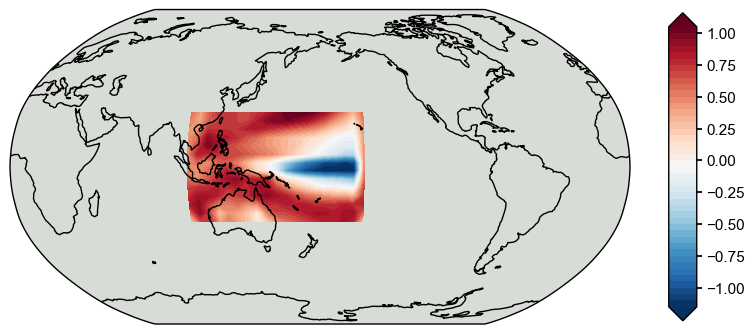

In [10]:
# plot the tas field
fig, ax = res.vars['tas'].field_list[0].plot(idx_t=-1)